In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the cleaned dataset
df = pd.read_csv("diabetes_cleaned.csv")

# Display the first 5 rows
df.head()




,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
0,1.709118,0.555017,2.197854,0.634773,0.137716,2.197183,0.151542,0.259896,-0.578659,0.479322,1.758207,0.494018,-0.655702
1,-0.798957,-1.180024,-1.294223,-1.922277,-1.658739,-1.624429,0.359175,-0.778199,-1.079046,-0.857855,-1.182325,-0.949955,-1.703567
2,0.501526,0.146772,-0.130197,0.484358,-0.221575,0.139392,-1.156546,-0.051533,0.422114,0.813616,-1.182325,0.442447,0.735381
3,-1.263416,-1.180024,-1.460513,-0.568545,-0.985068,-0.889503,-0.824333,-0.362961,0.071843,1.565777,0.287941,0.700299,0.623310
4,-0.427391,-1.180024,-1.294223,-0.418130,-1.097347,-0.301563,2.663900,-1.401056,-1.879665,-2.445751,-1.182325,-1.156237,-1.859066


In [27]:
# Normalize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Display the first 5 rows of the scaled data
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Insulin Levels                70000 non-null  float64
 1   Age                           70000 non-null  float64
 2   BMI                           70000 non-null  float64
 3   Blood Pressure                70000 non-null  float64
 4   Cholesterol Levels            70000 non-null  float64
 5   Waist Circumference           70000 non-null  float64
 6   Blood Glucose Levels          70000 non-null  float64
 7   Weight Gain During Pregnancy  70000 non-null  float64
 8   Pancreatic Health             70000 non-null  float64
 9   Pulmonary Function            70000 non-null  float64
 10  Neurological Assessments      70000 non-null  float64
 11  Digestive Enzyme Levels       70000 non-null  float64
 12  Birth Weight                  70000 non-null  float64
dtypes

In [29]:

# Drop categorical columns (assuming object types are categorical)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

df_scaled.describe().round(2)

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.54,-1.18,-2.13,-2.57,-2.13,-2.21,-1.68,-1.61,-1.88,-3.37,-1.18,-1.88,-2.24
25%,-0.80,-0.98,-0.80,-0.62,-0.72,-0.74,-0.82,-0.88,-0.78,-0.61,-1.18,-0.80,-0.66
50%,-0.24,-0.11,0.04,0.08,-0.09,-0.15,-0.18,0.05,-0.08,0.15,0.29,0.08,0.01
75%,0.59,0.81,0.70,0.68,0.68,0.58,0.69,0.68,0.82,0.73,0.29,0.75,0.78
max,2.45,2.34,2.36,1.89,2.34,2.79,2.87,2.44,2.57,1.57,1.76,2.71,1.96


In [18]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df_scaled)

# Convert to DataFrame
df_pca_2d = pd.DataFrame(pca_2d_result, columns=["PC1", "PC2"])

# Display the first 5 rows
df_pca_2d.head()

,PC1,PC2
0,2.624150,1.643332
1,-4.379489,0.077119
2,0.647788,-1.699469
3,-1.332050,-2.271528
4,-4.061359,3.072115


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

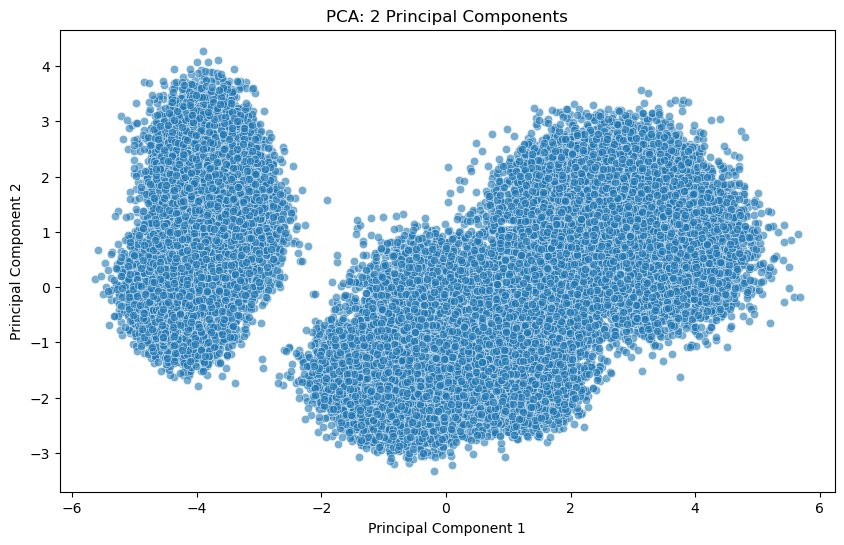

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_pca_2d["PC1"], y=df_pca_2d["PC2"], alpha=0.6)
plt.title("PCA: 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [21]:
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df_scaled)

# Convert to DataFrame
df_pca_3d = pd.DataFrame(pca_3d_result, columns=["PC1", "PC2", "PC3"])

# Display the first 5 rows
df_pca_3d.head()

,PC1,PC2,PC3
0,2.624150,1.643332,-0.140096
1,-4.379489,0.077119,-0.282175
2,0.647788,-1.699469,-0.900144
3,-1.332050,-2.271528,1.662848
4,-4.061359,3.072115,-1.282881


c:\Users\Rohan Jain\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


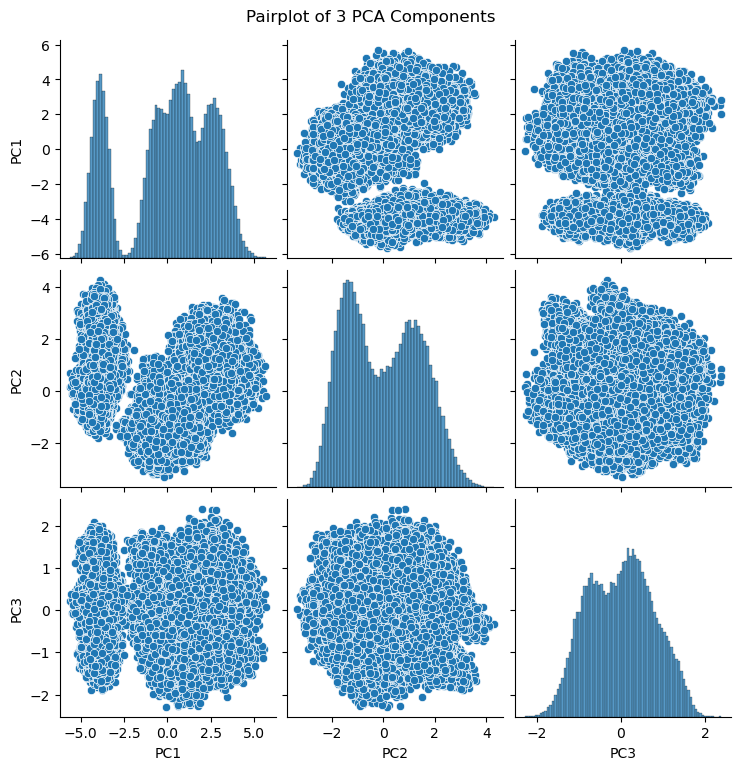

In [22]:
sns.pairplot(df_pca_3d)
plt.suptitle("Pairplot of 3 PCA Components", y=1.02)
plt.show()

In [23]:
# Percentage of variance explained
explained_variance_2d = np.sum(pca_2d.explained_variance_ratio_) * 100
explained_variance_3d = np.sum(pca_3d.explained_variance_ratio_) * 100

print(f"Variance retained in 2D PCA: {explained_variance_2d:.2f}%")
print(f"Variance retained in 3D PCA: {explained_variance_3d:.2f}%")

Variance retained in 2D PCA: 65.61%
Variance retained in 3D PCA: 70.30%


In [24]:
# Fit PCA with all components
pca_full = PCA()
pca_full.fit(df_scaled)

# Find the minimum number of components needed to retain 95% variance
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components_95 = np.argmax(explained_variance >= 0.95) + 1

print(f"Number of components needed to retain 95% variance: {num_components_95}")

Number of components needed to retain 95% variance: 11


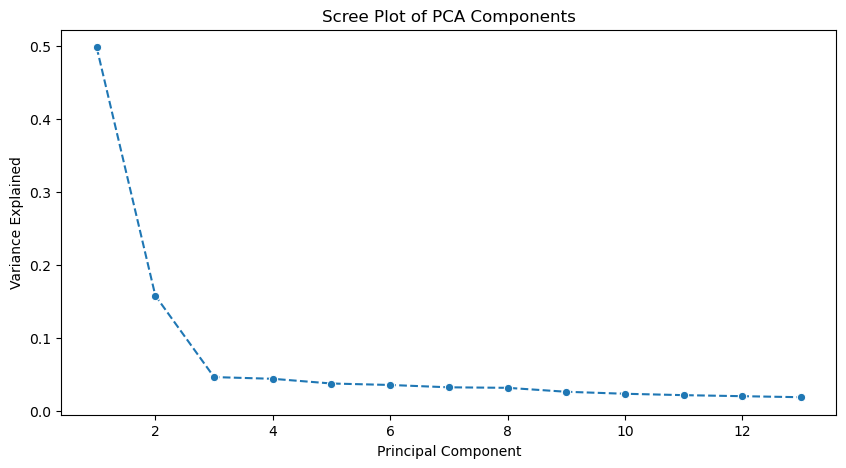

In [25]:
# Scree Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, len(pca_full.explained_variance_ratio_)+1), 
             y=pca_full.explained_variance_ratio_, 
             marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot of PCA Components")
plt.show()

In [27]:
# Extract and display the top 3 eigenvalues
top_3_eigenvalues = pca_full.explained_variance_[:3]
print("\nTop 3 Eigenvalues of the dataset:")
print(top_3_eigenvalues)


Top 3 Eigenvalues of the dataset:
[6.47232095 2.05658962 0.60963223]


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset (Ensure your dataset is correctly preprocessed before applying PCA)
df = pd.read_csv("diabetes_cleaned.csv")  # Update path if needed

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=min(df_numeric.shape[1], 10))  # Keep top 10 components
pca.fit(df_scaled)

# Create DataFrame for PCA loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)], 
                        index=df_numeric.columns)

# Find top 5 influencing features per principal component
top_features = {}
for pc in loadings.columns:
    top_features[pc] = loadings[pc].abs().nlargest(5).index.tolist()

# Convert results to DataFrame for better readability
top_features_df = pd.DataFrame(top_features)

# Display results
from IPython.display import display
display(top_features_df)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,Age,Blood Glucose Levels,Neurological Assessments,Pancreatic Health,Insulin Levels,Birth Weight,Digestive Enzyme Levels,BMI,Cholesterol Levels,Waist Circumference
1,Blood Pressure,Pulmonary Function,Insulin Levels,Birth Weight,Digestive Enzyme Levels,Pulmonary Function,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Blood Glucose Levels
2,Weight Gain During Pregnancy,Neurological Assessments,BMI,Pulmonary Function,Pulmonary Function,Insulin Levels,Waist Circumference,Weight Gain During Pregnancy,Blood Glucose Levels,Weight Gain During Pregnancy
3,Cholesterol Levels,Pancreatic Health,Pulmonary Function,Blood Glucose Levels,Weight Gain During Pregnancy,Blood Glucose Levels,Insulin Levels,Cholesterol Levels,Blood Pressure,Pulmonary Function
4,Waist Circumference,Digestive Enzyme Levels,Blood Pressure,Insulin Levels,Birth Weight,Age,Blood Glucose Levels,Digestive Enzyme Levels,Pulmonary Function,BMI


Optimal number of principal components to retain 95% variance: 11


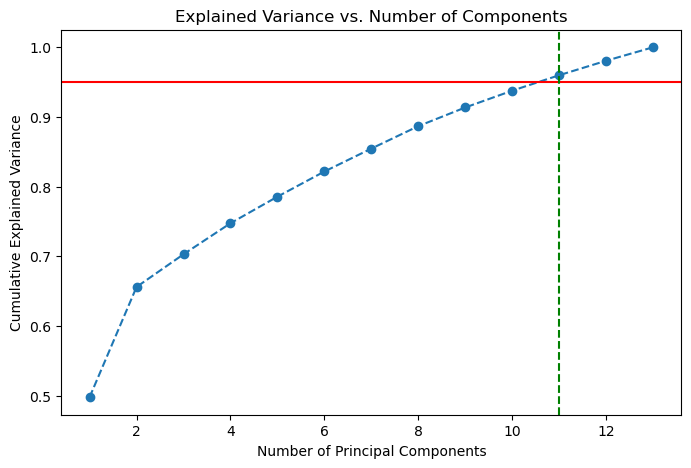

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset (replace with actual dataset)
df = pd.read_csv("diabetes_cleaned.csv")  # Ensure it's preprocessed and contains numerical features

# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to retain 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Optimal number of principal components to retain 95% variance: {optimal_components}")

# Plot the cumulative variance to visualize
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')  # Marking the 95% variance line
plt.axvline(x=optimal_components, color='g', linestyle='--')  # Marking optimal components
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()
